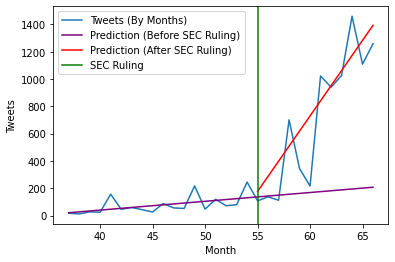

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_file=open('PS2_Data.txt','r')
raw_data=data_file.readlines()
data_file.close()
datefreq={}
for line in raw_data:
    parts=line.split(' ')
    datefreq[parts[0]]=int(parts[1])
months=[]
for y in ('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'):
    for m in ('01','02','03','04','05','06','07','08','09','10','11','12'):months.append(y+'-'+m)
x=list(range(1,121))
corr={}
y=[0]*120
for i in range(120):corr[months[i]]=i
for key in datefreq.keys():y[corr[key[:7]]]+=datefreq[key]
x1=list(range(37,56))
x2=list(range(55,67))
for i in range(len(x1)):x1[i]=[x1[i]]
for i in range(len(x2)):x2[i]=[x2[i]]
y1=y[36:55]
y2=y[55:67]
reg1=LinearRegression()
reg2=LinearRegression()
reg1.fit(x1,y1)
reg2.fit(x2,y2)
predy1=[]
predy2=[]
x1=list(range(37,67))
for x_val in x1:predy1.append(reg1.predict([[x_val]]))
for x_val in x2:predy2.append(reg2.predict([x_val]))
plt.plot(x[36:66],y[36:66],label='Tweets (By Months)')
plt.plot(list(range(37,67)),predy1,label='Prediction (Before SEC Ruling)',color='purple')
plt.plot(list(range(55,67)),predy2,label='Prediction (After SEC Ruling)',color='red')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.axvline(55,color='green',label='SEC Ruling')
plt.legend()
plt.show()